In [1]:
from astropy.io import fits
from astropy.wcs import WCS
import matplotlib.pyplot as plt
%matplotlib widget
import numpy as np

from astropy.coordinates import SkyCoord
import astropy.units as u

from glob import glob
import pandas as pd
from astropy.stats import sigma_clip

In [4]:
files = pd.read_csv('../pouakai/cal_lists/calibrated_image_list.csv')
files = files.iloc[1:]

In [24]:
sep = pd.read_csv('../dev/moon_seperation_test.csv')

In [27]:
sep

,file,moon_sep
0,/home/phys/astro8/MJArchive/MOA/ALERT/A6167-AR...,21.581991
1,/home/phys/astro8/MJArchive/MOA/ALERT/A6107-AR...,22.380215
2,/home/phys/astro8/MJArchive/MOA/ALERT/A7265-ys...,29.116736
3,/home/phys/astro8/MJArchive/MOA/ALERT/A7279-ys...,36.321347
4,/home/phys/astro8/MJArchive/MOA/ALERT/A3448-st...,38.858020
5,/home/phys/astro8/MJArchive/MOA/ALERT/A5755-ng...,44.996415
6,/home/phys/astro8/MJArchive/MOA/ALERT/A5671-C2...,49.999254
7,/home/phys/astro8/MJArchive/MOA/ALERT/A7243-ys...,54.785530
8,/home/phys/astro8/MJArchive/MOA/ALERT/A6608-20...,59.393448
9,/home/phys/astro8/MJArchive/MOA/ALERT/A6958-ys...,65.233796


In [25]:
reorder = sep['moon_sep'].values.argsort()

In [26]:
reorder

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])

In [17]:
reorder 

0     21.581991
1     22.380215
2     29.116736
3     36.321347
4     38.858020
5     44.996415
6     49.999254
7     54.785530
8     59.393448
9     65.233796
10    70.015631
11    75.076774
12    79.987918
13    85.002802
14    90.454338
Name: moon_sep, dtype: float64

In [6]:
files['savename']

1     /home/phys/astronomy/rri38/moon_test/cal/A6167...
2     /home/phys/astronomy/rri38/moon_test/cal/A6107...
3     /home/phys/astronomy/rri38/moon_test/cal/A7265...
4     /home/phys/astronomy/rri38/moon_test/cal/A7279...
5     /home/phys/astronomy/rri38/moon_test/cal/A3448...
6     /home/phys/astronomy/rri38/moon_test/cal/A5755...
7     /home/phys/astronomy/rri38/moon_test/cal/A5671...
8     /home/phys/astronomy/rri38/moon_test/cal/A7243...
9     /home/phys/astronomy/rri38/moon_test/cal/A6608...
10    /home/phys/astronomy/rri38/moon_test/cal/A6958...
11    /home/phys/astronomy/rri38/moon_test/cal/A6972...
12    /home/phys/astronomy/rri38/moon_test/cal/A3536...
13    /home/phys/astronomy/rri38/moon_test/cal/A5359...
14    /home/phys/astronomy/rri38/moon_test/cal/A3811...
Name: savename, dtype: object

In [34]:
d = fits.open(files['savename'].iloc[0])[0].data

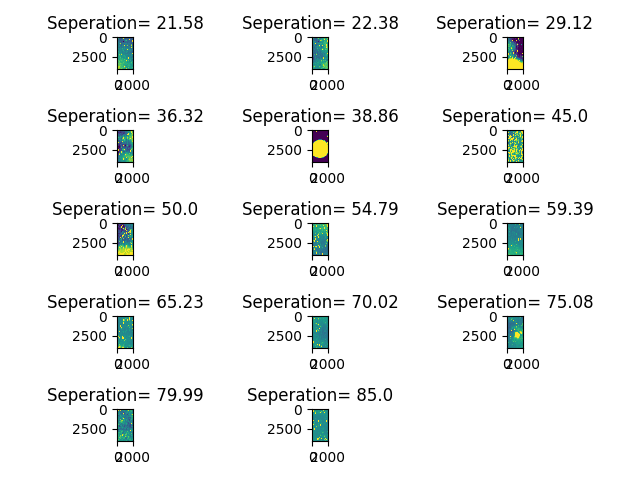

In [37]:
plt.figure()
for i in range(len(files)):
    plt.subplot(5,3,i+1)
    plt.title('Seperation= '+ str(np.round(sep['moon_sep'].values[i],2)))
    data = fits.open(files['savename'].iloc[i])[0].data
    plt.imshow(data,vmin=np.percentile(d,16),vmax=np.percentile(d,84))
plt.tight_layout()